In [2]:
import pandas as pd

data = pd.read_csv("data.csv")
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
data.shape

(920, 16)

In [4]:
data.columns.tolist()

['id',
 'age',
 'sex',
 'dataset',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [7]:
# create a binary target variable 0 and 1
data['target'] = data['num'].apply(lambda x : 1 if x > 0 else 0)
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


In [9]:
X = data.drop(['num','target'],axis=1,errors='ignore')
y = data['target']

In [10]:
# handel categorical & Numberic Features
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [15]:
categorical_cols = X.select_dtypes(include=['object','bool']).columns
numeric_cols = X.select_dtypes(exclude=["object","bool"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat",Pipeline([
            ("imputer",SimpleImputer(strategy="most_frequent")),
            ("encoder",OneHotEncoder(handle_unknown="ignore"))
        ]),categorical_cols),
        ("num",Pipeline([
            ("imputer",SimpleImputer(strategy="median"))
        ]),numeric_cols)
    ]
)

In [19]:
from sklearn.linear_model import LogisticRegression
model = Pipeline(steps=[
    ("preprocess",preprocessor),
    ("classifier",LogisticRegression(max_iter=1000))
])

In [20]:
# train test split
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [21]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Accuracy, Precision, Recall, F1-score
# https://medium.com/@codeswithpankaj/machine-learning-model-evaluation-metrics-explained-efec02abc738
from sklearn.metrics import accuracy_score , precision_score , recall_score ,f1_score
print("Accuracy = ",accuracy_score(y_test,y_pred))
print("Precision = ",precision_score(y_test,y_pred))
print("recall score = ",recall_score(y_test,y_pred))
print("F1 score = ",f1_score(y_test,y_pred))

Accuracy =  0.8315217391304348
Precision =  0.875
recall score =  0.8348623853211009
F1 score =  0.8544600938967136


In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[62 13]
 [18 91]]


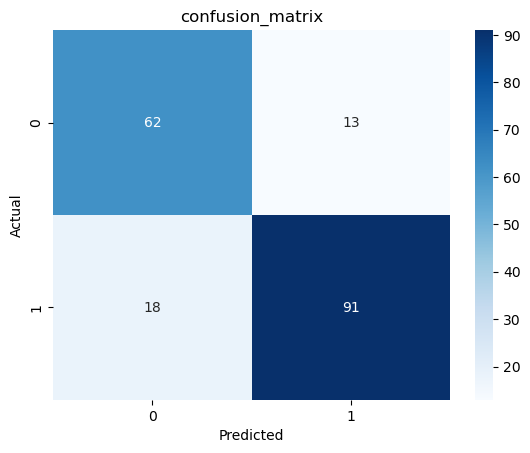

In [28]:
sns.heatmap(cm,annot=True , fmt="d",cmap="Blues")
plt.title("confusion_matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

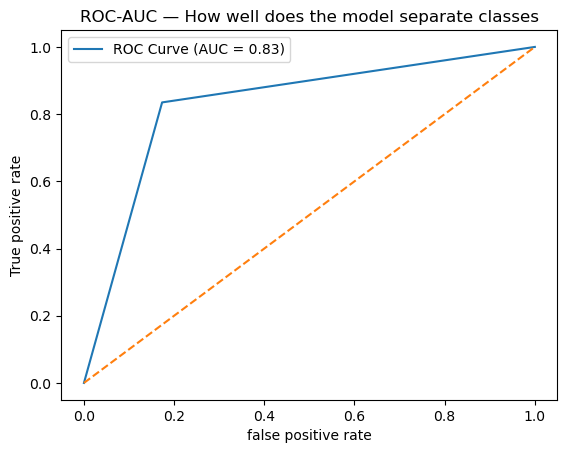

In [32]:
from sklearn.metrics import roc_curve , auc
fpr , tpr , thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr,label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("ROC-AUC — How well does the model separate classes")
plt.legend()
plt.show()